# QWERTY effect for Yelp business names

Yelp academic dataset: https://www.yelp.com/dataset_challenge

In [1]:
require(xtable,quietly = T)
source("DecodingFunctions.R")
options(warn=-1)

dsname <- "Yelp"
msg <- "Yelp Businesses"
load(paste(dsname,"df.RData", sep="/"))

In [2]:
nprods <- length(df$V)
nratings <- sum(df$nR)
avgRating <- mean(df$V)
avgRSR <- mean(df$RSR)
dfstats <- data.frame(nprods, nratings, avgRating, avgRSR)
  colnames(dfstats) <- c("Number of businesses", "Number of reviews", "Mean average rating", "mean RSR")
  row.names(dfstats) <- dsname

xtable(x=dfstats, caption=paste("Data summary for", msg), digits=10, comment=FALSE)

,Number of businesses,Number of reviews,Mean average rating,mean RSR
Yelp,56103,1516980,3.662212,0.4055592


In [3]:
linModels(df, dsname)

In [4]:
#Run this only if you have time!
rndLinModels(df, dsname, nrep=10000, verbose=FALSE)
bootLinModels(df, dsname, nrep=10000, verbose=FALSE)

In [4]:
calcPlotDataSimple(df, dsname)
runsfolder <- paste(dsname, "rundata", sep="-")
load(file=paste(runsfolder, "PlotDataSimple.RData", sep="/"))
load(file=paste(runsfolder, "RndEsts.RData", sep="/"))
load(file=paste(runsfolder, "Boot.RData", sep="/"))

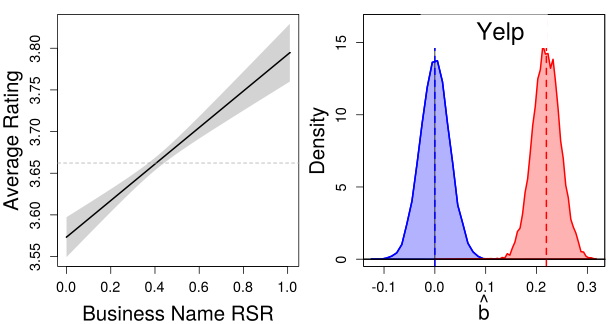

In [5]:
options(repr.plot.width=8.5, repr.plot.height=4.5)
options(jupyter.plot_mimetypes = 'image/svg+xml')
plotLM(plotData, rests, bests, xlab="Business Name RSR", ylab="Average Rating", booted=TRUE, coords=c(mean(df$RSA), mean(df$V)))
legend(x="top","Yelp", box.lty=0, box.lwd=0, bg="white", cex=2)

In [6]:
dfcontrols <- data.frame(df$nameLen, df$nwords, df$avgLetterFreq, df$avgWordFreq, df$nR)
linModelsControl(df$V, df$RSR, dfcontrols, dsname)

In [7]:
load(paste(runsfolder,"LinModel.RData", sep="/"))
load(paste(runsfolder,"LinModelNorm.RData", sep="/"))
load(file=paste(runsfolder,"LinModelRobust.RData",sep="/"))
load(file=paste(runsfolder,"LinModelControl.RData",sep="/"))

In [8]:
suppressMessages(library(stargazer))
names(linModel$coefficients) <- c( "1", "RSR")
names(linModelNorm$coefficients) <- c( "1", "RSR")
names(linModelRobust$coefficients) <- c( "1", "RSR")
names(linModelControl$coefficients) <- c( "1", "RSR")

Controls: number of letters, average letter frequency, number of words, average word frequency, number of ratings

In [9]:
stargazer(linModel, linModelNorm, linModelRobust,linModelControl, style="asr", digits=4, keep.stat=c("rsq", "n"), model.numbers=F, omit.table.layout="dm", column.labels=c("OLS", "Normalized", "Robust (MM)", "Residualized"), title=paste("Regression results for", msg), digit.separator=".", type="text")


Regression results for Yelp Businesses
-------------------------------------------------
       OLS    Normalized Robust (MM) Residualized
-------------------------------------------------
1   3.5733***   0.0000    3.6184***   -0.1202*** 
RSR 0.2192*** 0.0323***   0.2303***   0.2964***  
N    56.103     56.103     56.103       56.103   
R2   0.0010     0.0010     0.0012       0.0019   
-------------------------------------------------
*p < .05; **p < .01; ***p < .001                 


In [10]:
load(file=paste(runsfolder,"LinModel.RData",sep="/"))
load(file=paste(runsfolder,"LinModelRobust.RData",sep="/"))
load(file=paste(runsfolder,"RndEsts.RData",sep="/"))
load(file=paste(runsfolder,"Boot.RData",sep="/"))
load(file=paste(runsfolder,"SpearmanBoot.RData",sep="/"))
statsTable(dsname, linModel, bests, rests, rhoests, linModelRobust, msg=msg)

,t test p-value,bootstrap p-value,permutation p-value,Spearman p-value,robust p-value
,1.831128e-14,0,0,0,1.682893e-16
